# Precision-recall curves and Spearman correlation on ScRNA-seq

Nuha BinTayyash, 2020

This notebook shows the precision-recall curves and Spearman correlation scores resulted from running [DESeq2](https://bioconductor.org/packages/release/bioc/html/DESeq2.html) R package and sparse GPcounts one sample test with negative binomial and Gaussian likelihoods on ScRNA-seq gene expression data in Islet $\alpha$ cell from [GSE8737 single cell RNA-seq ](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE87375) dataset.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
import pandas as pd
from scipy import stats
from IPython.display import display

To normalize ScRNA-seq gene expression data in Islet $\alpha$ cell from [GSE8737 single cell RNA-seq ](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE87375) dataset and to run one sample test using [DESeq2](https://bioconductor.org/packages/release/bioc/html/DESeq2.html) R package run DESeq2_scRNA_seq.Rmd R notebook

In [2]:
GPcounts_NB_full = pd.read_csv('../data/ll_Negative_binomial_normalized_alpha_counts.csv',index_col=[0])
GPcounts_G_full = pd.read_csv('../data/ll_Gaussian_normalized_alpha_counts.csv',index_col=[0])
GPcounts_NB_full_sorted = GPcounts_NB_full.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_G_full_sorted = GPcounts_G_full.sort_values(by=['log_likelihood_ratio'], ascending=False)

print(GPcounts_NB_full.shape)
print(GPcounts_G_full.shape)

(18274, 3)
(18274, 3)


In [3]:
GPcounts_NB_full_sorted

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000000394,-4231.990874,-4451.189403,219.198529
ENSMUSG00000023944,-2420.093485,-2587.806608,167.713122
ENSMUSG00000021270,-2124.670688,-2250.920953,126.250265
ENSMUSG00000040856,-759.272905,-884.484654,125.211750
ENSMUSG00000027447,-2404.743861,-2526.950594,122.206733
...,...,...,...
ENSMUSG00000038010,-412.654693,-412.654660,0.000000
ENSMUSG00000038011,-60.210418,-60.210392,0.000000
ENSMUSG00000038013,-1081.936641,-1081.894472,0.000000
ENSMUSG00000038014,-1893.565976,-1893.500559,0.000000


In [4]:
GPcounts_G_full_sorted

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000100302,1370.372374,1.043804,1369.328570
ENSMUSG00000056586,1334.551382,71.275038,1263.276345
ENSMUSG00000094992,1258.358479,1.043804,1257.314675
ENSMUSG00000086708,1326.682706,79.981564,1246.701142
ENSMUSG00000074736,1206.012595,-5.350424,1211.363019
...,...,...,...
ENSMUSG00000074876,-366.216189,-365.716378,0.000000
ENSMUSG00000035642,-561.015868,-554.672896,0.000000
ENSMUSG00000035649,-643.448054,-643.448051,0.000000
ENSMUSG00000035653,-18.271627,-18.271621,0.000000


In [5]:
GPcounts_NB = pd.read_csv('../data/ll_sparse_Negative_binomial_normalized_alpha_counts.csv',index_col=[0])
GPcounts_G = pd.read_csv('../data/ll_sparse_Gaussian_normalized_alpha_counts.csv',index_col=[0])
GPcounts_NB_sorted = GPcounts_NB.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_G_sorted = GPcounts_G.sort_values(by=['log_likelihood_ratio'], ascending=False)
print(GPcounts_NB.shape)
print(GPcounts_G.shape)

(18274, 3)
(18274, 3)


In [6]:
GPcounts_NB_sorted

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000000394,-4237.127134,-4451.188994,214.061860
ENSMUSG00000023944,-2420.090742,-2587.806036,167.715294
ENSMUSG00000021270,-2124.670129,-2250.920665,126.250536
ENSMUSG00000040856,-759.273189,-884.484645,125.211456
ENSMUSG00000027447,-2404.747816,-2526.949690,122.201874
...,...,...,...
ENSMUSG00000036620,-682.900765,-682.899804,0.000000
ENSMUSG00000036622,-1323.311964,-1261.531085,0.000000
ENSMUSG00000036632,-1117.517725,-1117.512892,0.000000
ENSMUSG00000036636,-943.687786,-943.687646,0.000000


In [7]:
GPcounts_G_sorted

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000040856,-398.984709,-670.409439,271.424730
ENSMUSG00000000394,-134.557429,-367.599824,233.042395
ENSMUSG00000071178,-507.957795,-731.846045,223.888250
ENSMUSG00000073530,-587.971361,-783.221032,195.249671
ENSMUSG00000028415,-516.514591,-704.561297,188.046706
...,...,...,...
ENSMUSG00000025907,-648.696847,-648.696291,0.000000
ENSMUSG00000045102,21.685341,21.685355,0.000000
ENSMUSG00000025898,-601.311645,-601.311639,0.000000
ENSMUSG00000016382,-686.932191,-686.932165,0.000000


In [8]:
GPcounts_NB_2 = pd.read_csv('../data/ll_sparse_2_Negative_binomial_normalized_alpha_counts.csv',index_col=[0])
GPcounts_G_2 = pd.read_csv('../data/ll_sparse_2_Gaussian_normalized_alpha_counts.csv',index_col=[0])
GPcounts_NB_2_sorted = GPcounts_NB_2.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_G_2_sorted = GPcounts_G_2.sort_values(by=['log_likelihood_ratio'], ascending=False)
print(GPcounts_NB_2.shape)
print(GPcounts_G_2.shape)

(18274, 3)
(18274, 3)


In [9]:
GPcounts_NB_2_sorted

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000000394,-4236.943417,-4451.188994,214.245577
ENSMUSG00000023944,-2420.095172,-2587.806045,167.710873
ENSMUSG00000021270,-2124.681009,-2250.920663,126.239654
ENSMUSG00000040856,-759.273155,-884.484648,125.211493
ENSMUSG00000027447,-2404.747230,-2526.949690,122.202460
...,...,...,...
ENSMUSG00000031577,-1027.027110,-1027.021019,0.000000
ENSMUSG00000031583,-749.496769,-749.496698,0.000000
ENSMUSG00000031594,-409.896481,-409.896477,0.000000
ENSMUSG00000060131,-19.592093,-19.592093,0.000000


In [10]:
GPcounts_G_2_sorted

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000040856,-398.984672,-670.409439,271.424767
ENSMUSG00000000394,-134.586779,-367.599824,233.013046
ENSMUSG00000071178,-507.957699,-731.846045,223.888346
ENSMUSG00000073530,-587.971342,-783.221032,195.249690
ENSMUSG00000028415,-516.514575,-704.561297,188.046722
...,...,...,...
ENSMUSG00000054169,5.881489,5.881623,0.000000
ENSMUSG00000054161,-155.641210,-155.641208,0.000000
ENSMUSG00000022658,-265.526412,-265.526162,0.000000
ENSMUSG00000054115,-556.080328,-556.080321,0.000000


In [11]:
percentage = np.array(list(range(1,11)))
percentage = percentage * .10 # cut a percentage from the dataset

# index of genes ranked by log likelihood ratio from GPcounts with full NB likelihood
GPcounts_NB_full_index = list(GPcounts_NB_full_sorted.index.values) 
# index of genes ranked by log likelihood ratio from GPcounts with sparse NB likelihood
GPcounts_NB_index = list(GPcounts_NB_sorted.index.values)
GPcounts_NB_2_index = list(GPcounts_NB_2_sorted.index.values)

#### Gaussian likelihood 
# index of genes ranked by log likelihood ratio from GPcounts with full G likelihood
GPcounts_G_full_index = list(GPcounts_G_full_sorted.index.values) 
# index of genes ranked by log likelihood ratio from GPcounts with sparse NB likelihood
GPcounts_G_index = list(GPcounts_G_sorted.index.values)
GPcounts_G_2_index = list(GPcounts_G_2_sorted.index.values)

corr_NB = [] # correlation score  between GPcounts_NB full rank and GPcounts_NB sparse rank
corr_NB_2 = [] # correlation score  between GPcounts_NB full rank and GPcounts_NB sparse rank


corr_G = [] # correlation score  between GPcounts_G full rank and GPcounts_G sparse rank
corr_G_2 = [] # correlation score  between GPcounts_G full rank and GPcounts_G sparse rank


for count in range(10):
    print('Correlation score at:'+str(percentage[count])+' of the dataset:')
    # cut a percentage from the indexes
    GPcounts_NB_full_index_part= GPcounts_NB_full_index[int(len(GPcounts_NB_full_index) * .0) : int(len(GPcounts_NB_full_index) * percentage[count])]
    GPcounts_NB_rank_part = []
    GPcounts_NB_2_rank_part = []
    
    # Gaussian likelihood 
    GPcounts_G_full_index_part= GPcounts_G_full_index[int(len(GPcounts_G_full_index) * .0) : int(len(GPcounts_G_full_index) * percentage[count])]
    GPcounts_G_rank_part = []
    GPcounts_G_2_rank_part = []
    
    for i in GPcounts_NB_full_index_part:
        # locate gene from NB full rank in GPcounts sparse rank to correlate ranking
        GPcounts_NB_rank_part.append(GPcounts_NB_index.index(i))
        GPcounts_NB_2_rank_part.append(GPcounts_NB_2_index.index(i))
       
    GPcounts_NB_full_rank_part = list(range(0,len(GPcounts_NB_full_index_part)))
    
    rho, pval = stats.spearmanr(GPcounts_NB_full_rank_part,GPcounts_NB_rank_part)
    corr_NB.append(rho)
    print('NB sparse likelihood',rho)
    
    rho, pval = stats.spearmanr(GPcounts_NB_full_rank_part,GPcounts_NB_2_rank_part)
    corr_NB_2.append(rho)
    print('NB sparse 2 likelihood',rho)
    
   
    # Gaussian likelihood
    for i in GPcounts_G_full_index_part:
        # locate gene from NB full rank in GPcounts sparse rank to correlate ranking
        GPcounts_G_rank_part.append(GPcounts_G_index.index(i))
        GPcounts_G_2_rank_part.append(GPcounts_G_2_index.index(i))
        
    GPcounts_G_full_rank_part = list(range(0,len(GPcounts_G_full_index_part)))
    
    rho, pval = stats.spearmanr(GPcounts_G_full_rank_part,GPcounts_G_rank_part)
    corr_G.append(rho)
    print('Gaussian sparse likelihood',rho)
    
    rho, pval = stats.spearmanr(GPcounts_G_full_rank_part,GPcounts_G_2_rank_part)
    corr_G_2.append(rho)
    print('Gaussian sparse 2 likelihood',rho)
    
   

Correlation score at:0.1 of the dataset:
NB sparse likelihood 0.8224023218218666
NB sparse 2 likelihood 0.9203041089738258
Gaussian sparse likelihood 0.6113357899195886
Gaussian sparse 2 likelihood 0.6007270829120664
Correlation score at:0.2 of the dataset:
NB sparse likelihood 0.8255485024568842
NB sparse 2 likelihood 0.9499512558390816
Gaussian sparse likelihood 0.777246570540285
Gaussian sparse 2 likelihood 0.7633872259014552
Correlation score at:0.30000000000000004 of the dataset:
NB sparse likelihood 0.8265861959991404
NB sparse 2 likelihood 0.9630748567425012
Gaussian sparse likelihood 0.84408241473678
Gaussian sparse 2 likelihood 0.8294290061866177
Correlation score at:0.4 of the dataset:
NB sparse likelihood 0.8282753677627942
NB sparse 2 likelihood 0.9712251209116772
Gaussian sparse likelihood 0.887813622998606
Gaussian sparse 2 likelihood 0.8718461642251238
Correlation score at:0.5 of the dataset:
NB sparse likelihood 0.8274084193517877
NB sparse 2 likelihood 0.97448797246056

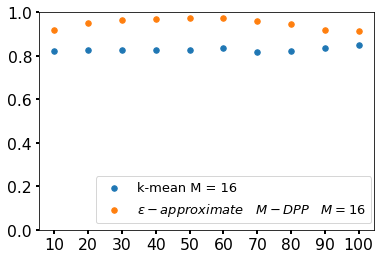

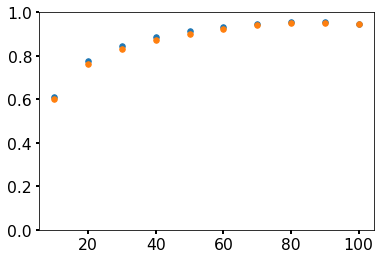

In [12]:
plt.rcParams.update({'font.size': 13})
plt.xticks(percentage*100)

plt.scatter(percentage*100,corr_NB,s=30,label ='k-mean M = 16')
plt.scatter(percentage*100,corr_NB_2,s=30,label ='$\epsilon- approximate\quad M-DPP\quadM = 16$')

plt.ylim(0.,1.)
plt.tick_params(labelsize='large', width=2)
plt.legend(bbox_to_anchor=(.15, 0), loc='lower left', ncol=1)
plt.show()

plt.scatter(percentage*100,corr_G,s=30,label ='k-mean M = 16')
plt.scatter(percentage*100,corr_G_2,s=30,label ='$\epsilon- approximate\quad M-DPP\quadM = 16$')

#plt.xlabel('percentage of dataset', fontsize=16)
#plt.ylabel('Spearman correlation', fontsize=16)
plt.ylim(0.,1.)
plt.tick_params(labelsize='large', width=2)
#plt.legend(bbox_to_anchor=(.28, 0), loc='lower left', ncol=1)
plt.show()

In [13]:
(sum(corr_NB) / len(corr_NB))*100

82.86104337207695

In [14]:
(sum(corr_NB_2) / len(corr_NB_2))*100

94.92775388348633